<font color=red>Veri Kümesi Hakkında

<font color = green>Bu veri seti, Hindistan'daki kredi başvuru sahiplerinin, kredi onayına uygunluklarını değerlendirmek için gerekli olan çeşitli özelliklerine ilişkin bilgiler sağlar.

Her sütunun kısa bir açıklamasını burada bulabilirsiniz:

Applicant_ID: Her kredi başvurusu sahibi için benzersiz tanımlayıcı.

Annual_Income: Kredi başvurusunda bulunan kişinin yıllık geliridir.

Applicant_Age: Kredi başvurusunda bulunan kişinin yaşı.

Work_Experience: Kredi başvurusunda bulunan kişinin iş deneyimi yılı sayısı.

Marital_Status: Kredi başvurusunda bulunan kişinin medeni durumu.

House_Ownership: Başvuru sahibinin ikametgahının mülkiyet durumu.

Vehicle_Ownership(car): Başvuru sahibinin aracının mülkiyet durumu.

Occupation: Kredi başvurusunda bulunan kişinin mesleği veya mesleği.

Residence_City: Kredi başvurusu sahibinin ikamet ettiği şehir.

Residence_State: Kredi başvurusunda bulunan kişinin ikamet ettiği eyalet.

Years_in_Current_Employment: Başvuru sahibinin mevcut işinde çalıştığı yıl sayısı.

Years_in_Current_Residence: Başvuru sahibinin mevcut ikametgahında ikamet ettiği yıl sayısı.

Loan_Default_Risk: Kredi başvurusunda bulunan kişinin krediyi temerrüde düşürme riskiyle karşı karşıya olup olmadığını gösteren değerlerle birlikte kredi temerrüt riski göstergesi.

In [1]:
import pyspark
import pandas as pd

import os
import sys
from pyspark.sql import SparkSession

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

In [2]:
import os
import sys
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
spark

In [3]:
path = 'Applicant-details.csv'

df= spark.read.csv(path,header=True,inferSchema=True,sep=",")
df.show(5)

+------------+-------------+-------------+---------------+--------------+---------------+----------------------+--------------------+--------------+---------------+---------------------------+--------------------------+-----------------+
|Applicant_ID|Annual_Income|Applicant_Age|Work_Experience|Marital_Status|House_Ownership|Vehicle_Ownership(car)|          Occupation|Residence_City|Residence_State|Years_in_Current_Employment|Years_in_Current_Residence|Loan_Default_Risk|
+------------+-------------+-------------+---------------+--------------+---------------+----------------------+--------------------+--------------+---------------+---------------------------+--------------------------+-----------------+
|       75722|      9657655|           76|              0|        single|         rented|                    no|        Psychologist|     Jalandhar|         Punjab|                          0|                        12|                0|
|       80185|      9259353|           37|      

In [4]:
df.count(), len(df.columns)

(100000, 13)

In [5]:
df.printSchema()

root
 |-- Applicant_ID: integer (nullable = true)
 |-- Annual_Income: integer (nullable = true)
 |-- Applicant_Age: integer (nullable = true)
 |-- Work_Experience: integer (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- House_Ownership: string (nullable = true)
 |-- Vehicle_Ownership(car): string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Residence_City: string (nullable = true)
 |-- Residence_State: string (nullable = true)
 |-- Years_in_Current_Employment: integer (nullable = true)
 |-- Years_in_Current_Residence: integer (nullable = true)
 |-- Loan_Default_Risk: integer (nullable = true)



In [6]:
# sutun isimleri
for col in df.columns:
    print(col)

Applicant_ID
Annual_Income
Applicant_Age
Work_Experience
Marital_Status
House_Ownership
Vehicle_Ownership(car)
Occupation
Residence_City
Residence_State
Years_in_Current_Employment
Years_in_Current_Residence
Loan_Default_Risk


In [7]:
# eksik değerler kontrolü

from pyspark.sql import functions as F

# df içindeki eksik değerleri kontrol et
df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df.columns]).show(5)

+------------+-------------+-------------+---------------+--------------+---------------+----------------------+----------+--------------+---------------+---------------------------+--------------------------+-----------------+
|Applicant_ID|Annual_Income|Applicant_Age|Work_Experience|Marital_Status|House_Ownership|Vehicle_Ownership(car)|Occupation|Residence_City|Residence_State|Years_in_Current_Employment|Years_in_Current_Residence|Loan_Default_Risk|
+------------+-------------+-------------+---------------+--------------+---------------+----------------------+----------+--------------+---------------+---------------------------+--------------------------+-----------------+
|           0|            0|            0|              0|             0|              0|                     0|         0|             0|              0|                          0|                         0|                0|
+------------+-------------+-------------+---------------+--------------+---------------

In [8]:
# veri tiplerini kontrol et
# DataFrame şemasını al
schema = df.schema

# Sütunları veri tipine göre gruplandır
group_columns = {}
for field in schema.fields:
    data_type = str(field.dataType)
    column_name = field.name
    group_columns.setdefault(data_type, []).append(column_name)

# Gruplandırılmış sütunları yazdır
for data_type, columns in group_columns.items():
    column_list = ", ".join(columns)
    print(f"{data_type}:\n{column_list}\n")

IntegerType():
Applicant_ID, Annual_Income, Applicant_Age, Work_Experience, Years_in_Current_Employment, Years_in_Current_Residence, Loan_Default_Risk

StringType():
Marital_Status, House_Ownership, Vehicle_Ownership(car), Occupation, Residence_City, Residence_State



In [9]:
# Belirtilen sütunlardaki benzersiz değerlerin alınması
unique_values = {}
columnss= ["Marital_Status", "House_Ownership", "Vehicle_Ownership(car)", "Occupation", "Residence_City", "Residence_State"]

for col in columnss:
    unique_values[col] = df.select(col).distinct().collect()

# Benzersiz değerlerin yazdırılması
for col, values in unique_values.items():
    print(f"{col} Benzersiz Değerler:")
    for row in values:
        print(row[col])
    print("\n")


Marital_Status Benzersiz Değerler:
married
single


House_Ownership Benzersiz Değerler:
norent_noown
rented
owned


Vehicle_Ownership(car) Benzersiz Değerler:
no
yes


Occupation Benzersiz Değerler:
Physician
Scientist
Petroleum_Engineer
Technical_writer
Police_officer
Fashion_Designer
Army_officer
Chemical_engineer
Chartered_Accountant
Lawyer
Air_traffic_controller
Chef
Flight_attendant
Technology_specialist
Designer
Consultant
Drafter
Statistician
Computer_hardware_engineer
Magistrate
Graphic_Designer
Secretary
Architect
Librarian
Design_Engineer
Analyst
Technician
Software_Developer
Surgeon
Official
Hotel_Manager
Artist
Web_designer
Microbiologist
Firefighter
Computer_operator
Industrial_Engineer
Biomedical_Engineer
Engineer
Financial_Analyst
Surveyor
Comedian
Mechanical_engineer
Civil_engineer
Politician
Civil_servant
Economist
Aviator
Psychologist
Geologist
Dentist


Residence_City Benzersiz Değerler:
Bangalore
Vasai-Virar
Aurangabad[39]
Udaipur
Raichur
Khandwa
Bhind
Anantapuram[2

In [10]:
# Belirtilen sütunlardaki benzersiz değerlerin sayısının alınması

unique_value_counts = {}
columnss = ["Marital_Status", "House_Ownership", "Vehicle_Ownership(car)", "Occupation", "Residence_City", "Residence_State"]

for column in columnss:
    unique_value_counts[column] = df.select(column).distinct().count()

for column, count in unique_value_counts.items():
    print(f"{column} Benzersiz Değer Sayısı: {count}")

Marital_Status Benzersiz Değer Sayısı: 2
House_Ownership Benzersiz Değer Sayısı: 3
Vehicle_Ownership(car) Benzersiz Değer Sayısı: 2
Occupation Benzersiz Değer Sayısı: 51
Residence_City Benzersiz Değer Sayısı: 317
Residence_State Benzersiz Değer Sayısı: 29


In [11]:
# Applicant_ID: sil
# Residence_City: ikamet edilen şehir, sil
# Marital_Status: medeni durum, encod
# House_Ownership: evin mülkiyet durumu, encod
# Vehicle_Ownership(car): aracın mülkiyet durumu, encod
# Occupation: meslekler,grupla, encod
# Residence_State: ikamet edilen eyalet,grupla, encod


In [12]:
df = df.drop("Applicant_ID","Residence_City")
df.show(3)

+-------------+-------------+---------------+--------------+---------------+----------------------+------------------+---------------+---------------------------+--------------------------+-----------------+
|Annual_Income|Applicant_Age|Work_Experience|Marital_Status|House_Ownership|Vehicle_Ownership(car)|        Occupation|Residence_State|Years_in_Current_Employment|Years_in_Current_Residence|Loan_Default_Risk|
+-------------+-------------+---------------+--------------+---------------+----------------------+------------------+---------------+---------------------------+--------------------------+-----------------+
|      9657655|           76|              0|        single|         rented|                    no|      Psychologist|         Punjab|                          0|                        12|                0|
|      9259353|           37|             18|        single|         rented|                    no|Petroleum_Engineer|    West_Bengal|                         12|      

In [13]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when


# Meslek kategorilerinin belirlenmesi
occupation_categories = {
    "Medical": ["Physician", "Surgeon", "Dentist", "Nurse", "Paramedic", "Pharmacist", "Microbiologist"],

    "Engineering": ["Petroleum_Engineer", "Chemical_engineer", "Computer_hardware_engineer", "Mechanical_engineer", "Civil_engineer", "Industrial_Engineer", "Biomedical_Engineer", "Electrical_engineer"],

    "Legal": ["Lawyer", "Magistrate", "Judge", "Paralegal"],

    

    "Art": ["Fashion_Designer", "Graphic_Designer", "Artist"],

    "Public_Service": ["Police_officer", "Army_officer", "Firefighter"],
    
}

# Koşullu bir sütun oluşturma
category_column = when(col("Occupation").isin(occupation_categories["Medical"]), "Medical") \
    .when(col("Occupation").isin(occupation_categories["Engineering"]), "Engineering") \
    .when(col("Occupation").isin(occupation_categories["Legal"]), "Legal") \
    .when(col("Occupation").isin(occupation_categories["Art"]), "Art") \
    .when(col("Occupation").isin(occupation_categories["Public_Service"]), "Public_Service") \
    .otherwise("Other")

# Yeni sütunu DataFrame'e ekleme
df = df.withColumn("Occupation_Category", category_column)
df = df = df.drop("Occupation")

# Sonucu gösterme
df.show(5)


+-------------+-------------+---------------+--------------+---------------+----------------------+---------------+---------------------------+--------------------------+-----------------+-------------------+
|Annual_Income|Applicant_Age|Work_Experience|Marital_Status|House_Ownership|Vehicle_Ownership(car)|Residence_State|Years_in_Current_Employment|Years_in_Current_Residence|Loan_Default_Risk|Occupation_Category|
+-------------+-------------+---------------+--------------+---------------+----------------------+---------------+---------------------------+--------------------------+-----------------+-------------------+
|      9657655|           76|              0|        single|         rented|                    no|         Punjab|                          0|                        12|                0|              Other|
|      9259353|           37|             18|        single|         rented|                    no|    West_Bengal|                         12|                     

In [14]:
df.select("Occupation_Category").distinct().show(10)

+-------------------+
|Occupation_Category|
+-------------------+
|        Engineering|
|                Art|
|     Public_Service|
|              Other|
|              Legal|
|            Medical|
+-------------------+



In [15]:
from pyspark.sql.functions import when

# Eyaletleri coğrafi bölgelere göre gruplayacağım
region_mapping = {
    "Kuzey Hindistan": ["Punjab", "Haryana", "Uttar Pradesh", "Delhi", "Jammu and Kashmir", "Himachal Pradesh"],
    "Güney Hindistan": ["Kerala", "Tamil Nadu", "Karnataka", "Telangana", "Andhra Pradesh"],
    "Doğu Hindistan": ["Bihar", "Jharkhand", "Odisha", "West Bengal", "Assam", "Tripura", "Sikkim", "Mizoram", "Manipur", "Nagaland", "Arunachal Pradesh", "Meghalaya"],
    "Batı Hindistan": ["Gujarat", "Rajasthan", "Maharashtra", "Goa"],
    "Orta Hindistan": ["Madhya Pradesh", "Chhattisgarh", "Uttarakhand", "Chandigarh", "Dadra and Nagar Haveli and Daman and Diu"]
}

# Koşullu bir sütun oluşturma
region_column = when(col("Residence_State").isin(region_mapping["Kuzey Hindistan"]), "Kuzey Hindistan") \
    .when(col("Residence_State").isin(region_mapping["Güney Hindistan"]), "Güney Hindistan") \
    .when(col("Residence_State").isin(region_mapping["Doğu Hindistan"]), "Doğu Hindistan") \
    .when(col("Residence_State").isin(region_mapping["Batı Hindistan"]), "Batı Hindistan") \
    .when(col("Residence_State").isin(region_mapping["Orta Hindistan"]), "Orta Hindistan") \
    .otherwise("Diğer")

# Yeni sütunu DataFrame'e ekleme
df = df.withColumn("Region", region_column)
df = df = df.drop("Residence_State")

# Sonucu gösterme
df.show(5)


+-------------+-------------+---------------+--------------+---------------+----------------------+---------------------------+--------------------------+-----------------+-------------------+---------------+
|Annual_Income|Applicant_Age|Work_Experience|Marital_Status|House_Ownership|Vehicle_Ownership(car)|Years_in_Current_Employment|Years_in_Current_Residence|Loan_Default_Risk|Occupation_Category|         Region|
+-------------+-------------+---------------+--------------+---------------+----------------------+---------------------------+--------------------------+-----------------+-------------------+---------------+
|      9657655|           76|              0|        single|         rented|                    no|                          0|                        12|                0|              Other|Kuzey Hindistan|
|      9259353|           37|             18|        single|         rented|                    no|                         12|                        11|          

In [16]:
df.select("Region").distinct().show(10)

+---------------+
|         Region|
+---------------+
| Orta Hindistan|
| Batı Hindistan|
|Kuzey Hindistan|
|          Diğer|
|Güney Hindistan|
| Doğu Hindistan|
+---------------+



In [17]:
# tekrardan kontrol ediyorum

schema = df.schema
# Sütunları veri tipine göre gruplandır
grouped_columns = {}
for field in schema.fields:
    data_type = str(field.dataType)
    column_name = field.name
    grouped_columns.setdefault(data_type, []).append(column_name)

# Gruplandırılmış sütunları yazdır
for data_type, columns in grouped_columns.items():
    column_list = ", ".join(columns)
    print(f"{data_type}:\n{column_list}\n")

IntegerType():
Annual_Income, Applicant_Age, Work_Experience, Years_in_Current_Employment, Years_in_Current_Residence, Loan_Default_Risk

StringType():
Marital_Status, House_Ownership, Vehicle_Ownership(car), Occupation_Category, Region



In [18]:
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import OneHotEncoder, StringIndexer
from pyspark.ml import Pipeline

# StringIndexer kullanarak kategorik sütunları indeksleyin
cols = ['Marital_Status','House_Ownership','Vehicle_Ownership(car)','Occupation_Category','Region']

stringIndexer = StringIndexer(inputCols=cols, outputCols=[col + '_Index' for col in cols])
indexed_df = stringIndexer.fit(df).transform(df)

# OneHotEncoder ile indekslenen sütunları dönüştürün
encoder = OneHotEncoder(inputCols=[col + '_Index' for col in cols], 
                        outputCols=[col + '_Vec' for col in cols])
encoded_df = encoder.fit(indexed_df).transform(indexed_df)

# Orjinal kategorik sütunları veri çerçevesinden kaldırın
encoded_cols = [col + '_Index' for col in cols] + cols
df = encoded_df.drop(*encoded_cols)

df.show(5)


+-------------+-------------+---------------+---------------------------+--------------------------+-----------------+------------------+-------------------+--------------------------+-----------------------+-------------+
|Annual_Income|Applicant_Age|Work_Experience|Years_in_Current_Employment|Years_in_Current_Residence|Loan_Default_Risk|Marital_Status_Vec|House_Ownership_Vec|Vehicle_Ownership(car)_Vec|Occupation_Category_Vec|   Region_Vec|
+-------------+-------------+---------------+---------------------------+--------------------------+-----------------+------------------+-------------------+--------------------------+-----------------------+-------------+
|      9657655|           76|              0|                          0|                        12|                0|     (1,[0],[1.0])|      (2,[0],[1.0])|             (1,[0],[1.0])|          (5,[0],[1.0])|(5,[4],[1.0])|
|      9259353|           37|             18|                         12|                        11|        

In [19]:
# target sütununu en sona taşıdım
df = df.select([c for c in df.columns if c != 'Loan_Default_Risk'] + ['Loan_Default_Risk'])
df.show(2)

+-------------+-------------+---------------+---------------------------+--------------------------+------------------+-------------------+--------------------------+-----------------------+-------------+-----------------+
|Annual_Income|Applicant_Age|Work_Experience|Years_in_Current_Employment|Years_in_Current_Residence|Marital_Status_Vec|House_Ownership_Vec|Vehicle_Ownership(car)_Vec|Occupation_Category_Vec|   Region_Vec|Loan_Default_Risk|
+-------------+-------------+---------------+---------------------------+--------------------------+------------------+-------------------+--------------------------+-----------------------+-------------+-----------------+
|      9657655|           76|              0|                          0|                        12|     (1,[0],[1.0])|      (2,[0],[1.0])|             (1,[0],[1.0])|          (5,[0],[1.0])|(5,[4],[1.0])|                0|
|      9259353|           37|             18|                         12|                        11|     (1,

In [20]:
# tekrardan kontrol ettim


schema = df.schema
# Sütunları veri tipine göre gruplandır
grouped_columns = {}
for field in schema.fields:
    data_type = str(field.dataType)
    column_name = field.name
    grouped_columns.setdefault(data_type, []).append(column_name)

# Gruplandırılmış sütunları yazdır
for data_type, columns in grouped_columns.items():
    column_list = ", ".join(columns)
    print(f"{data_type}:\n{column_list}\n")

IntegerType():
Annual_Income, Applicant_Age, Work_Experience, Years_in_Current_Employment, Years_in_Current_Residence, Loan_Default_Risk

VectorUDT():
Marital_Status_Vec, House_Ownership_Vec, Vehicle_Ownership(car)_Vec, Occupation_Category_Vec, Region_Vec



In [21]:
df.count(), len(df.columns)

(100000, 11)

In [22]:
# target sutununda dağılımlar dengeli mi kontrol et
df.groupby('Loan_Default_Risk').count().show()

+-----------------+-----+
|Loan_Default_Risk|count|
+-----------------+-----+
|                1|12997|
|                0|87003|
+-----------------+-----+



In [23]:
# Her bir sınıfın sayısını hesapla
counts = df.groupby('Loan_Default_Risk').count()

# Toplam örnek sayısını bul
total = counts.agg({"count": "sum"}).collect()[0][0]

# Her bir sınıfın yüzdesini hesapla
counts = counts.withColumn("percentage", (counts["count"] / total) * 100)

# Sonuçları göster
counts.show()


+-----------------+-----+----------+
|Loan_Default_Risk|count|percentage|
+-----------------+-----+----------+
|                1|12997|    12.997|
|                0|87003|    87.003|
+-----------------+-----+----------+



In [24]:
# features kolonunu oluşturma

from pyspark.ml.feature import VectorAssembler

# 'Loan_Default_Risk' sütunu dışında tüm sütunları al
x_columns = df.columns[:-1]
assembler = VectorAssembler(inputCols=x_columns, outputCol='features')
output = assembler.transform(df)

df = output.select('features', output['Loan_Default_Risk'].alias('label'))
df.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(19,[0,1,4,5,6,8,...|    0|
|(19,[0,1,2,3,4,5,...|    0|
|(19,[0,1,2,3,4,5,...|    0|
|(19,[0,1,2,3,4,5,...|    1|
|(19,[0,1,2,3,4,5,...|    0|
+--------------------+-----+
only showing top 5 rows



In [25]:
from pyspark.sql.functions import col

# Etiketlere göre veri setini filtrele
class_0_train = df.filter(col("label") == 0)
class_1_train = df.filter(col("label") == 1)

# Sınıf 0 ve 1 için ayrı ayrı randomSplit yaparak train ve test kümelerini oluştur
train_0, test_0 = class_0_train.randomSplit([0.8, 0.2], seed=42)
train_1, test_1 = class_1_train.randomSplit([0.8, 0.2], seed=42)

# Train ve test kümelerini birleştir
train = train_0.union(train_1)
test = test_0.union(test_1)

print('TRAIN')
train.groupby('label').count().show()

print('TEST')
test.groupby('label').count().show()


TRAIN
+-----+-----+
|label|count|
+-----+-----+
|    0|69714|
|    1|10480|
+-----+-----+

TEST
+-----+-----+
|label|count|
+-----+-----+
|    0|17289|
|    1| 2517|
+-----+-----+



In [26]:
"""
uzun sürdüğü için kodu çalıştırmadım

# grid search, best parameter, random forest

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol='features', labelCol='label')

paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [100, 200])
             .addGrid(rf.maxDepth, [5, 10])
             .addGrid(rf.minInstancesPerNode, [1, 5, 10])
             .addGrid(rf.minInfoGain, [0.0, 0.1, 0.2])
             .addGrid(rf.subsamplingRate, [0.5, 0.8, 1.0])
             .addGrid(rf.featureSubsetStrategy, ['sqrt', 'log2'])
             .addGrid(rf.impurity, ['gini', 'entropy'])
             .build())

evaluator = BinaryClassificationEvaluator()

cv = CrossValidator(estimator=rf,
                    estimatorParamMaps=paramGrid,
                    evaluator=evaluator,
                    numFolds=5)

cvModel = cv.fit(train)

"""


In [ ]:
"""

bestModel = cvModel.bestModel

print("En iyi modelin maxDepth değeri:", bestModel.getMaxDepth())
print("En iyi modelin numTrees değeri:", bestModel.getNumTrees)
print("En iyi modelin featureSubsetStrategy değeri:", bestModel.getFeatureSubsetStrategy())

"""

In [26]:
# best parameter değerleri ile en iyi modeli kur
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator


rf = RandomForestClassifier(maxDepth=5,numTrees=100)

evaluator = BinaryClassificationEvaluator()

model = rf.fit(train)

In [27]:
training_summary = model.summary

print("train")
print("Area Under ROC (AUC): " + str(training_summary.areaUnderROC))
print("Accuracy: " + str(training_summary.accuracy ))
print("f1_score: " + str(training_summary.weightedFMeasure()))

train
Area Under ROC (AUC): 0.6216811641489641
Accuracy: 0.8693169065017333
f1_score: 0.808543357524106


In [28]:
predictions = model.transform(test)
predictions.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(19,[0,1,2,3,4,5,...|    0|[87.7648545005771...|[0.87764854500577...|       0.0|
|(19,[0,1,2,3,4,5,...|    0|[87.7648545005771...|[0.87764854500577...|       0.0|
|(19,[0,1,2,3,4,5,...|    0|[87.7648545005771...|[0.87764854500577...|       0.0|
|(19,[0,1,2,3,4,5,...|    0|[86.4226729854697...|[0.86422672985469...|       0.0|
|(19,[0,1,2,3,4,5,...|    0|[86.1754846435346...|[0.86175484643534...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



In [29]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator,MulticlassClassificationEvaluator


print("train")
print("Area Under ROC (AUC): " + str(training_summary.areaUnderROC))
print("Accuracy: " + str(training_summary.accuracy ))
print("f1_score: " + str(training_summary.weightedFMeasure()))

print("-----------------------------------")

print("test")
evaluator = BinaryClassificationEvaluator()
print('AUC:', evaluator.evaluate(predictions))

evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
print("Accuracy:",evaluator.evaluate(predictions))

evaluator = MulticlassClassificationEvaluator(metricName="f1")
print("f1_score:",evaluator.evaluate(predictions))

train
Area Under ROC (AUC): 0.6216811641489641
Accuracy: 0.8693169065017333
f1_score: 0.808543357524106
-----------------------------------
test
AUC: 0.609652661399275
Accuracy: 0.8729172977885489
f1_score: 0.8136874059288973


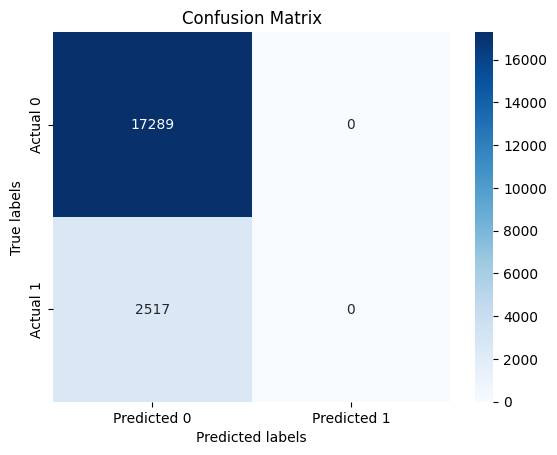

In [30]:
# confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_true = predictions.select('label').toPandas()
y_pred = predictions.select('prediction').toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred, labels=[0,1])

import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix'i heatmap olarak görselleştirme
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
plt.show()

In [31]:
from pyspark.sql.functions import col, when

TP = predictions.filter((col("prediction") == 1) & (col("label") == 1)).count()
FP = predictions.filter((col("prediction") == 1) & (col("label") == 0)).count()
FN = predictions.filter((col("prediction") == 0) & (col("label") == 1)).count()

# Hassasiyet (Precision) hesapla
precision = (TP / (TP + FP))*100 if (TP + FP) != 0 else 0

# Geri çağırma (Recall) hesapla
recall = (TP / (TP + FN))*100 if (TP + FN) != 0 else 0

print("Precision = {:.2f}".format(precision))
print("Recall = {:.2f}".format(recall))

Precision = 0.00
Recall = 0.00


In [ ]:
# modelim sınıflar arasında ayrım yapamamış
# train ve test setinin Accuracy ile f1_score değerlerine bakıldığı zaman test seti daha iyi değerler vermiş overfit olmuş olabilir